# Homework 8

In this homework, we're going to conduct the data analysis from single-cell RNA sequencing ([scRNA-seq](https://academic.oup.com/nar/article/42/14/8845/1269819)), a cutting-edge method in current biological science. In brief, this method enables researchers to inspect the expression level of thousands of genes in each individual cell (and they can sequence thousands or millions of cells in the experiment).

Note that biology knowledge is NOT the pre-requisite to finish this homework.


## Task 1: Load the Dataset

Download the "pbmc_data.csv" from Canvas. This dataset contains the expression of 1840 genes in 2638 cells collected from [peripheral blood](https://en.wikipedia.org/wiki/Peripheral_blood_mononuclear_cell) of a healthy person. 

The whole dataset has 2638 rows and 1840 columns. 
- Each row represents one cell, and the index denotes the cell name (called barcode tags in biology). 
- The first 1838 columns represent different genes, and the column names are the gene names in biology. The values represent the scaled value of gene expression (that's why they are some negative numbers). Larger value means higher expression level of the gene.
- The 1839-th column, named `cell_type`, represents the category of each cell, withthe 1840-th column `cell_type_string` denotes their names in biology (for instance, B cells and different kinds of T cells).

**Requirements**
1. Use pandas to read the csv file. *Hint*: you may set the argument `index_col =0` in the `read_csv` function, which automatically takes the first column as the row index (sample name).
2. Create the Numpy array ``X`` of shape (2638, 1838), representing the gene expression levels in different cells
3. Create the Numpy array ``y`` (2638,), representing the `cell_type` column in the dataframe.
4. Don't forget to import the relevant packages.

In [64]:
import pandas as pd
pbmc_data = pd.read_csv('pbmc_data.csv', index_col = 0)
X = pbmc_data.iloc[:,0:1838].to_numpy() #gene expression levels in different cells
y = pbmc_data.loc[:,'cell_type'].to_numpy() #cell type

In [50]:
X.shape

(2638, 1838)

In [51]:
y.shape

(2638,)

## Task 2: Cell Type Classification

**Requirements**
1. Split the data into training and test dataset randomly. The test datset should consist of 20% of the whole dataset. You can refer to the Homework 7 to see more hints about how to do this.
2. Identify the cell types (`y`) from gene expression profiles `X`. Using scikit-learn, train four models -- 1) logistic regression 2) kNN 3) Decision Tree 4) Random Forest in **training dataset**, and report their performances on **test dataset**.

**Hints**
1. You can choose the parameters in the models as you like -- doing cross-validation is not a basic requirement. Of course it would be great if you use CV to select parameters.
2. Some models won't perform very well. Don't feel surprised and instead think why.
3. General Experience: In random forest, you can set `max_depth`(around 50) and `max_features` (around 500) relatively large to have a better performance, because in this data the number of features ($p$) is large.
4. In logistic regression and random forest, set `n_jobs = -1` when creating the classifier helps to save the running time.
5. If you're still not familiar with sklearn, refer to the [website](https://scikit-learn.org/stable/index.html).

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

#1. create test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#2. report performance on test dataset
#logistic regression
lr = LogisticRegression()
lr.fit(X_train,y_train)
print('logistic regression score: ', lr.score(X_test,y_test))
print('Predicted cell types: ', lr.predict(X))

#kNN
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train, y_train)
print('kNN score: ', knn.score(X_test,y_test))
print('Predicted cell types: ', knn.predict(X))

#Decision Tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
print('Decision Tree score: ', dt.score(X_test,y_test))
print('Predicted cell types: ', dt.predict(X))

#Random Forest
rf = RandomForestClassifier(n_estimators=1000, max_depth=50, random_state=0, n_jobs = -1)
rf.fit(X_train, y_train) 
print('Random Forest score: ', rf.score(X_test, y_test))
print('Predicted cell types: ', rf.predict(X))

C:\Users\adamg\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\adamg\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


logistic regression score:  0.9356060606060606
Predicted cell types:  [0 2 0 ... 2 2 0]
kNN score:  0.5170454545454546
Predicted cell types:  [0 0 0 ... 0 0 0]
Decision Tree score:  0.9109848484848485
Predicted cell types:  [0 2 0 ... 2 2 0]
Random Forest score:  0.9299242424242424
Predicted cell types:  [0 2 0 ... 2 2 0]


## Task 3: Dimension Reduction

Sometimes scRNA-seq can lead to discovery of new cell types, therefore unsupervised learning is important in this field to explore the "pattern" of dataset. Below you can use the sklearn package to perform dimension reduction tasks.

**Requirements**
1. Conduct PCA on `X` with 50 principal components, generate numpy array `X_pca` of shape (2638, 50), which represents the score of each sample on the first 50 PCs (hence the dimension of each sample is reduced from 1838 to 50 by doing PCA).
2. Perform tSNE on `X_pca` (instead of on the `X`!!!), generate numpy array `X_tsne` --By doing this, we reduce the data further to 2 dimenions.
3. Run the provided code to plot the dimension reduction scatter plot.

**Hints**
1. Because of the randomness of tSNE and different parameters chosen, the tSNE results may look different from the provided figure -- it's totally understandable as long as your codes are correct.
2. There are some parameters to tune in [tSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html?highlight=tsne#sklearn.manifold.TSNE) -- of course there's no problem if you use the default. For instance, you may find `init` and `metric `argument useful. 

In [63]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
#1. conduct PCA on X with 50 principal components
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)
#2. Perform tSNA on X_pca
X_tsne = TSNE(init='pca').fit_transform(X_pca)

In [60]:
X_pca.shape

(2638, 50)

In [61]:
X_tsne.shape

(2638, 2)

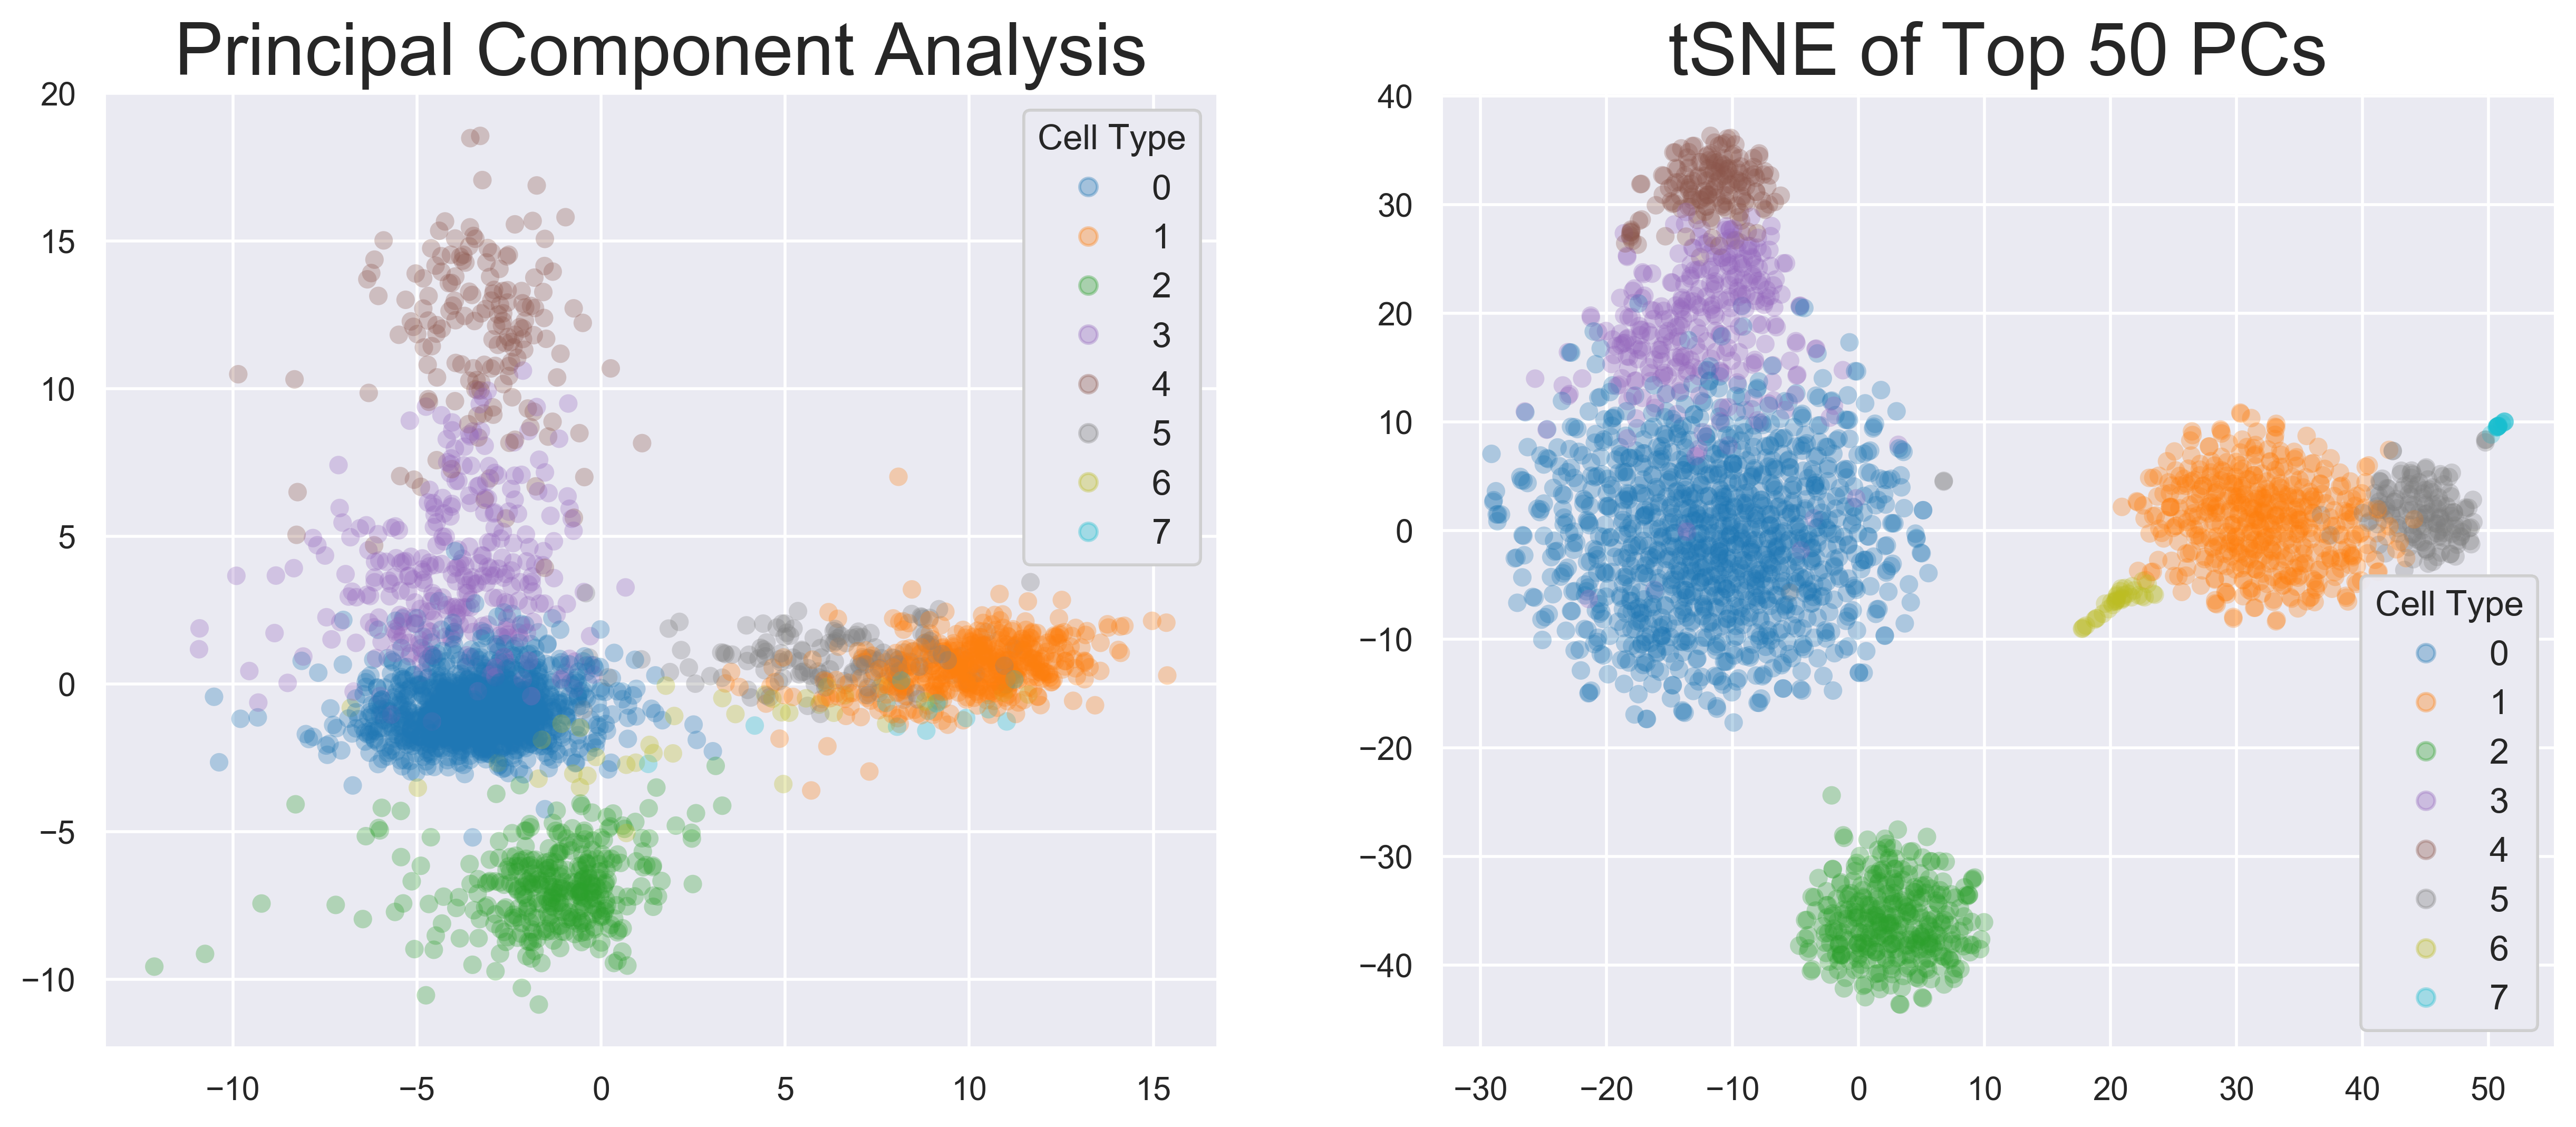

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,6),dpi = 400)

fig1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1],c=y, s= 40, edgecolor='none', alpha=0.3,cmap=plt.cm.get_cmap('tab10', 8))
fig2 = ax2.scatter(X_tsne[:, 0], X_tsne[:, 1],c=y, s= 40, edgecolor='none', alpha=0.3,cmap=plt.cm.get_cmap('tab10', 8))

ax1.set_title('Principal Component Analysis',size=25)
legend1 = ax1.legend(*fig1.legend_elements(), loc="best", title="Cell Type",prop={'size': 12})
ax1.add_artist(legend1)

ax2.set_title('tSNE of Top 50 PCs',size=25)
legend2 = ax2.legend(*fig2.legend_elements(), loc="best", title="Cell Type",prop={'size': 12})
ax2.add_artist(legend2)

## Task 4: Your final project

This is not a task in homework, but a reminder that you can already finish everthing in final project. Make sure your final project is already in good shape when submitting this homework -- otherwise it would be too late!

## Optional Task

1. Will dimension reduction help to improve the cell classification?


2. In Python, one popular professional package for scRNA-seq analysis is [Scanpy](https://scanpy.readthedocs.io/en/stable/). Try exploring the dataset with Scanpy, and refer to the tutorial [here](https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html)


3. Data science plays important role in single-cell biology. If interested, read the [review paper](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-020-1926-6) and [practical tutorial](https://www.embopress.org/doi/full/10.15252/msb.20188746)

In [ ]:
# your codes here